# Task 1

Test the hypothesis that the delay is from Normal distribution. and that mean of the delay is 0. Be careful about the outliers.

## Written plan

1.a Departure delays distribution
- remove cancelled flights
- remove nan from dep_delay
- remove outliers
- Plot dep_delay
- Perform the Shapiro-Wilk test for normality.
- Get mean and median

1.b Arrival delays distribution
- remove cancelled flights
- remove nan from dep_delay
- remove outliers
- Plot dep_delay
- Perform the Shapiro-Wilk test for normality.
- Get mean and median

In [3]:
#Import libraries

import pandas as pd
pd.set_option('display.max_columns', None) # Display all the columns
import numpy as np

In [ ]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
from datetime import datetime

In [3]:
#Import data
path = '../../../data/'
df = pd.read_csv(str(path)+"flights_sample_10.csv",low_memory=False)

In [1]:
#df

6454

### 1.A Departure Delays Distribution

In [5]:
# Remove canceled flights and dep_delay null values
df1a = df[(df.cancelled == 0) & df.dep_delay.notnull()]

In [6]:
x = df1a.dep_delay # all remaining values
xwo = x[x.between(x.quantile(.10), x.quantile(.90))] # remove outliers outliers

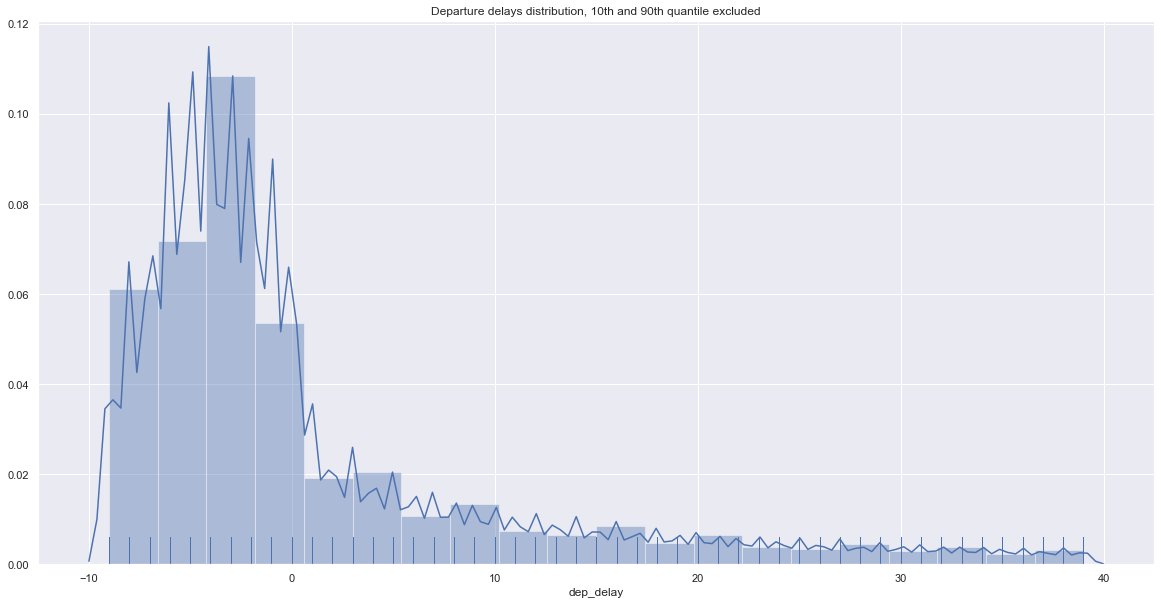

In [7]:
#Histogram
plt.figure(figsize=(20,10))
sns.distplot(xwo, bins=20, rug=True).set_title('Departure delays distribution, 10th and 90th quantile excluded');

In [8]:
#Shapiro test
shapiro_test = stats.shapiro(xwo)
shapiro_test

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7743074893951416, pvalue=0.0)

In [9]:
print(f'Departure delay median : {xwo.median()}')
print(f'Departure delay mean : {xwo.mean()}')

Departure delay median : -2.0
Departure delay mean : 0.7856154846253857


### 1.B Arrival Delays Distribution

In [10]:
# Remove canceled flights and arr_delay with null values
df1b = df[(df.cancelled == 0) & df.arr_delay.notnull()]

In [11]:
x = df1b.arr_delay # all remaining values
xwo = x[x.between(x.quantile(.10), x.quantile(.90))] # without outliers

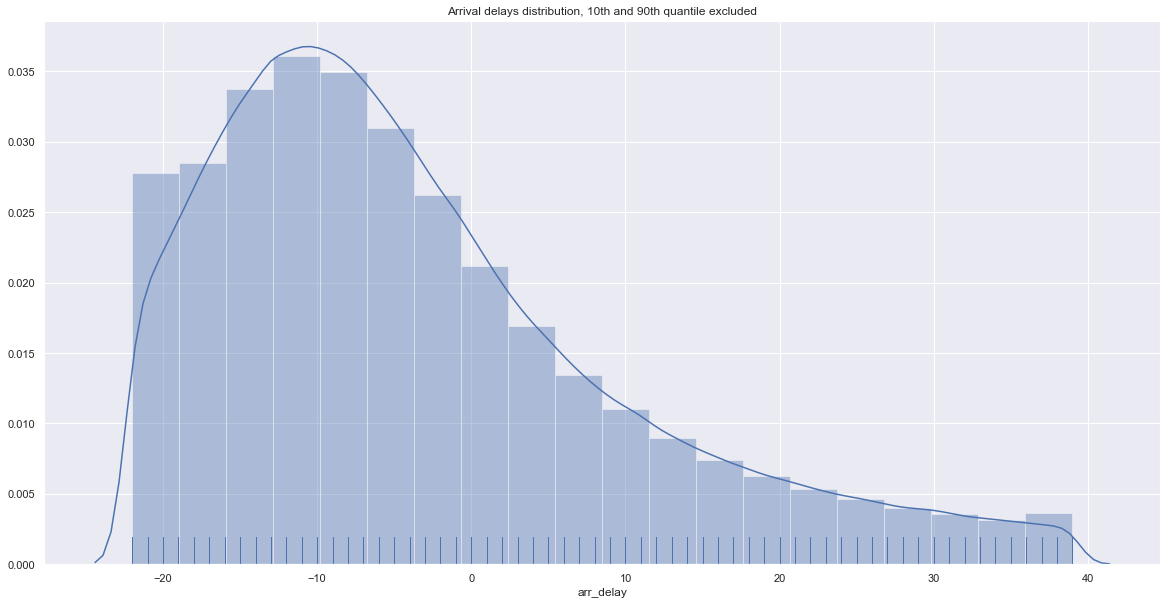

In [12]:
#Histogram
plt.figure(figsize=(20,10))
sns.distplot(xwo, bins=20, rug=True).set_title('Arrival delays distribution, 10th and 90th quantile excluded');

In [13]:
Shapiro test
shapiro_test = stats.shapiro(xwo)
shapiro_test

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.927739143371582, pvalue=0.0)

In [15]:
print(f'Arrival delay median : {xwo.median()}')
print(f'Arrival delay mean : {xwo.mean()}')

Arrival delay median : -6.0
Arrival delay mean : -3.2448565713430817


# Task 3
Does the weather affect the delay?
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:

sunny
cloudy
rainy
snow. Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

Written plan
- Select flights with weather delay
- Create columns dep_weather and arrival weather
- Create columns with dep_date_time and arrival_date_time
- query Visual crossing API and grap condition.



In [17]:
#Pick flights with weather delays > 10 minutes
df3 = df[df.weather_delay >= 10]

In [18]:
df3 = df3.sort_values('weather_delay')

In [19]:
# Remove outliers
df3 = df3[df3.weather_delay.between(x.quantile(.05), x.quantile(.95))]

# Pick 200 drandom sample
df3a = df3.sample(n = 200)

# Make new columns to populate with weather API
df3a['origin_weather'] = ""
df3a['dest_weather'] = ""

# Keep only important columns
df3a = df3a[['fl_date','mkt_unique_carrier','mkt_carrier_fl_num','origin','origin_city_name','crs_dep_time','origin_weather','dest','dest_city_name','crs_arr_time','dest_weather','weather_delay']]
df3a.head(10)

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,origin_city_name,crs_dep_time,origin_weather,dest,dest_city_name,crs_arr_time,dest_weather,weather_delay
282323,2019-05-10,DL,2704,RSW,"Fort Myers, FL",1835,,ATL,"Atlanta, GA",2024,,40.0
1211584,2018-12-06,DL,3680,DTW,"Detroit, MI",836,,BUF,"Buffalo, NY",1011,,46.0
49313,2018-02-22,AA,3695,SGF,"Springfield, MO",608,,ORD,"Chicago, IL",750,,10.0
919433,2018-03-23,WN,2122,SEA,"Seattle, WA",1055,,OAK,"Oakland, CA",1305,,31.0
1515506,2019-01-24,DL,7359,GTF,"Great Falls, MT",608,,SLC,"Salt Lake City, UT",748,,26.0
229444,2018-07-17,AA,1211,ORD,"Chicago, IL",845,,EWR,"Newark, NJ",1146,,10.0
1264321,2018-12-30,UA,5385,JAC,"Jackson, WY",1440,,SFO,"San Francisco, CA",1623,,21.0
198279,2018-07-04,DL,2051,MSP,"Minneapolis, MN",1432,,LAS,"Las Vegas, NV",1549,,10.0
252596,2018-07-27,UA,2416,LGA,"New York, NY",1823,,DEN,"Denver, CO",2059,,18.0
691271,2019-10-11,UA,2156,IAH,"Houston, TX",1205,,SAN,"San Diego, CA",1323,,11.0


In [20]:

# Pad crs dep and arr hour to "0000"
df3a['crs_dep_time'] = df3a['crs_dep_time'].apply(lambda x: '{0:0>4}'.format(x))
df3a['crs_arr_time'] = df3a['crs_arr_time'].apply(lambda x: '{0:0>4}'.format(x))
df3a.reset_index(inplace=True)
df3a

,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,origin_city_name,crs_dep_time,origin_weather,dest,dest_city_name,crs_arr_time,dest_weather,weather_delay
0,282323,2019-05-10,DL,2704,RSW,"Fort Myers, FL",1835,,ATL,"Atlanta, GA",2024,,40.0
1,1211584,2018-12-06,DL,3680,DTW,"Detroit, MI",0836,,BUF,"Buffalo, NY",1011,,46.0
2,49313,2018-02-22,AA,3695,SGF,"Springfield, MO",0608,,ORD,"Chicago, IL",0750,,10.0
3,919433,2018-03-23,WN,2122,SEA,"Seattle, WA",1055,,OAK,"Oakland, CA",1305,,31.0
4,1515506,2019-01-24,DL,7359,GTF,"Great Falls, MT",0608,,SLC,"Salt Lake City, UT",0748,,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1265357,2018-12-31,AA,5141,CLT,"Charlotte, NC",0950,,AGS,"Augusta, GA",1101,,11.0
196,1257176,2018-12-27,DL,694,ATL,"Atlanta, GA",2124,,MSY,"New Orleans, LA",2205,,16.0
197,806089,2019-06-03,G4,617,RAP,"Rapid City, SD",2131,,AZA,"Phoenix, AZ",2246,,44.0
198,241330,2018-07-23,WN,1451,ATL,"Atlanta, GA",2225,,MCI,"Kansas City, MO",2330,,10.0


In [21]:
# Convert fl_date to datetime, and format Crs dep and arr hour to "00:00"

df3a['fl_date'] = pd.to_datetime(df3a['fl_date'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')
df3a['crs_dep_time'] = pd.to_datetime(df3a['crs_dep_time'], format='%H%M').dt.strftime('%H:%M')
df3a['crs_arr_time'] = pd.to_datetime(df3a['crs_arr_time'], format='%H%M').dt.strftime('%H:%M')


In [39]:
# Checkpoint : export table
df3a.to_csv('../../../data/weather.csv')

In [4]:
# import table
df3b = pd.read_csv('../../../data/weather_origin.csv')
df3b

,Unnamed: 0,Unnamed: 0.1,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,origin_city_name,crs_dep_time,origin_weather,dest,dest_city_name,crs_arr_time,dest_weather,weather_delay
0,0,0,282323,2019-05-10,DL,2704,RSW,"Fort Myers, FL",18:35,"Rain, Clear",ATL,"Atlanta, GA",20:24,NaN,40.0
1,1,1,1211584,2018-12-06,DL,3680,DTW,"Detroit, MI",08:36,Partially cloudy,BUF,"Buffalo, NY",10:11,NaN,46.0
2,2,2,49313,2018-02-22,AA,3695,SGF,"Springfield, MO",06:08,"Rain, Overcast",ORD,"Chicago, IL",07:50,NaN,10.0
3,3,3,919433,2018-03-23,WN,2122,SEA,"Seattle, WA",10:55,"Rain, Clear",OAK,"Oakland, CA",13:05,NaN,31.0
4,4,4,1515506,2019-01-24,DL,7359,GTF,"Great Falls, MT",06:08,Partially cloudy,SLC,"Salt Lake City, UT",07:48,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,1265357,2018-12-31,AA,5141,CLT,"Charlotte, NC",09:50,"Rain, Overcast",AGS,"Augusta, GA",11:01,NaN,11.0
196,196,196,1257176,2018-12-27,DL,694,ATL,"Atlanta, GA",21:24,"Rain, Overcast",MSY,"New Orleans, LA",22:05,NaN,16.0
197,197,197,806089,2019-06-03,G4,617,RAP,"Rapid City, SD",21:31,"Rain, Clear",AZA,"Phoenix, AZ",22:46,NaN,44.0
198,198,198,241330,2018-07-23,WN,1451,ATL,"Atlanta, GA",22:25,"Rain, Partially cloudy",MCI,"Kansas City, MO",23:30,NaN,10.0


## Get API request

In [6]:
import requests as re
import time
import os
import json

def get_weather(city_name, fl_date, time):
    #Date format : 2020-08-02THH%3AMM%3ASS
    startDateTime = str(fl_date)+'T'+crs_dep_time[:2]+'%3A'+crs_dep_time[-2:]+'%3A00'
    key = os.environ['VISUAL_CROSSING_API_KEY'] #real key in local variables
    url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history?aggregateHours=24&combinationMethod=aggregate&startDateTime="+startDateTime+"&endDateTime="+startDateTime+"&collectStationContributions=false&maxStations=-1&maxDistance=-1&includeNormals=false&allowAsynch=true&contentType=json&unitGroup=metric&locationMode=single&key="+key+"&locations="+city_name
    res = re.get(url)
    data = json.loads(res.text) 
    try:
        return data['location']['values'][0]['conditions']
    except (KeyError):
        return data

# testing code : 
# city_name=df3b.iloc[0]['dest_city_name']
# fl_date=df3b.iloc[0]['fl_date']
# crs_dep_time = df3b.iloc[0]['crs_arr_time']
# test_request = get_weather(city_name, fl_date, time)
#str(fl_date)+'T%3A'+crs_dep_time+'T%3A00'
#str(fl_date)+'T'+crs_dep_time[:2]+'%3A'+crs_dep_time[-2:]+'%3A00'

In [7]:
test_request

'Rain, Partially cloudy'

In [5]:
df3b.iloc[0]['dest_city_name']

'Atlanta, GA'

In [43]:
# Populate origin_weather column : 
#df3b['origin_weather'] = df3b.apply(lambda x: get_weather(x['origin_city_name'], x['fl_date'], x['crs_dep_time']), axis= 1)

In [61]:
df3b

,Unnamed: 0,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,origin_city_name,crs_dep_time,origin_weather,dest,dest_city_name,crs_arr_time,dest_weather,weather_delay
0,0,282323,2019-05-10,DL,2704,RSW,"Fort Myers, FL",18:35,"Rain, Clear",ATL,"Atlanta, GA",20:24,NA,40.0
1,1,1211584,2018-12-06,DL,3680,DTW,"Detroit, MI",08:36,Partially cloudy,BUF,"Buffalo, NY",10:11,NA,46.0
2,2,49313,2018-02-22,AA,3695,SGF,"Springfield, MO",06:08,"Rain, Overcast",ORD,"Chicago, IL",07:50,NA,10.0
3,3,919433,2018-03-23,WN,2122,SEA,"Seattle, WA",10:55,"Rain, Clear",OAK,"Oakland, CA",13:05,NA,31.0
4,4,1515506,2019-01-24,DL,7359,GTF,"Great Falls, MT",06:08,Partially cloudy,SLC,"Salt Lake City, UT",07:48,NA,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,1265357,2018-12-31,AA,5141,CLT,"Charlotte, NC",09:50,"Rain, Overcast",AGS,"Augusta, GA",11:01,NA,11.0
196,196,1257176,2018-12-27,DL,694,ATL,"Atlanta, GA",21:24,"Rain, Overcast",MSY,"New Orleans, LA",22:05,NA,16.0
197,197,806089,2019-06-03,G4,617,RAP,"Rapid City, SD",21:31,"Rain, Clear",AZA,"Phoenix, AZ",22:46,NA,44.0
198,198,241330,2018-07-23,WN,1451,ATL,"Atlanta, GA",22:25,"Rain, Partially cloudy",MCI,"Kansas City, MO",23:30,NA,10.0


In [8]:
# Populate dest_weather column : 
df3b['dest_weather'] = df3b.apply(lambda x: get_weather(x['dest_city_name'], x['fl_date'], x['crs_arr_time']), axis= 1)

In [10]:
# Save results origin
df3b.to_csv('../../../data/weather_origin_destination.csv')

In [9]:
df3b

,Unnamed: 0,Unnamed: 0.1,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,origin_city_name,crs_dep_time,origin_weather,dest,dest_city_name,crs_arr_time,dest_weather,weather_delay
0,0,0,282323,2019-05-10,DL,2704,RSW,"Fort Myers, FL",18:35,"Rain, Clear",ATL,"Atlanta, GA",20:24,"Rain, Partially cloudy",40.0
1,1,1,1211584,2018-12-06,DL,3680,DTW,"Detroit, MI",08:36,Partially cloudy,BUF,"Buffalo, NY",10:11,"Snow, Partially cloudy",46.0
2,2,2,49313,2018-02-22,AA,3695,SGF,"Springfield, MO",06:08,"Rain, Overcast",ORD,"Chicago, IL",07:50,Clear,10.0
3,3,3,919433,2018-03-23,WN,2122,SEA,"Seattle, WA",10:55,"Rain, Clear",OAK,"Oakland, CA",13:05,Clear,31.0
4,4,4,1515506,2019-01-24,DL,7359,GTF,"Great Falls, MT",06:08,Partially cloudy,SLC,"Salt Lake City, UT",07:48,"Snow, Partially cloudy",26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,1265357,2018-12-31,AA,5141,CLT,"Charlotte, NC",09:50,"Rain, Overcast",AGS,"Augusta, GA",11:01,"Rain, Overcast",11.0
196,196,196,1257176,2018-12-27,DL,694,ATL,"Atlanta, GA",21:24,"Rain, Overcast",MSY,"New Orleans, LA",22:05,"Rain, Overcast",16.0
197,197,197,806089,2019-06-03,G4,617,RAP,"Rapid City, SD",21:31,"Rain, Clear",AZA,"Phoenix, AZ",22:46,Clear,44.0
198,198,198,241330,2018-07-23,WN,1451,ATL,"Atlanta, GA",22:25,"Rain, Partially cloudy",MCI,"Kansas City, MO",23:30,Clear,10.0


In [14]:
# Save full results
df3c = pd.read_csv('../../../data/weather_origin_destination.csv')
df3c = df3c.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1)

In [15]:
df3c

,index,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,origin,origin_city_name,crs_dep_time,origin_weather,dest,dest_city_name,crs_arr_time,dest_weather,weather_delay
0,282323,2019-05-10,DL,2704,RSW,"Fort Myers, FL",18:35,"Rain, Clear",ATL,"Atlanta, GA",20:24,"Rain, Partially cloudy",40.0
1,1211584,2018-12-06,DL,3680,DTW,"Detroit, MI",08:36,Partially cloudy,BUF,"Buffalo, NY",10:11,"Snow, Partially cloudy",46.0
2,49313,2018-02-22,AA,3695,SGF,"Springfield, MO",06:08,"Rain, Overcast",ORD,"Chicago, IL",07:50,Clear,10.0
3,919433,2018-03-23,WN,2122,SEA,"Seattle, WA",10:55,"Rain, Clear",OAK,"Oakland, CA",13:05,Clear,31.0
4,1515506,2019-01-24,DL,7359,GTF,"Great Falls, MT",06:08,Partially cloudy,SLC,"Salt Lake City, UT",07:48,"Snow, Partially cloudy",26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1265357,2018-12-31,AA,5141,CLT,"Charlotte, NC",09:50,"Rain, Overcast",AGS,"Augusta, GA",11:01,"Rain, Overcast",11.0
196,1257176,2018-12-27,DL,694,ATL,"Atlanta, GA",21:24,"Rain, Overcast",MSY,"New Orleans, LA",22:05,"Rain, Overcast",16.0
197,806089,2019-06-03,G4,617,RAP,"Rapid City, SD",21:31,"Rain, Clear",AZA,"Phoenix, AZ",22:46,Clear,44.0
198,241330,2018-07-23,WN,1451,ATL,"Atlanta, GA",22:25,"Rain, Partially cloudy",MCI,"Kansas City, MO",23:30,Clear,10.0


In [37]:
#Look at value counts
df3c.origin_weather.value_counts()

Rain, Partially cloudy    68
Rain, Overcast            33
Clear                     28
Partially cloudy          24
Rain, Clear               24
Snow, Overcast            11
Snow, Partially cloudy     5
Snow, Clear                4
Overcast                   3
Name: origin_weather, dtype: int64

In [38]:
df3c.dest_weather.value_counts()

Partially cloudy          57
Clear                     55
Rain, Partially cloudy    32
Rain, Overcast            24
Rain, Clear               19
Overcast                   5
Snow, Partially cloudy     3
Snow, Overcast             3
Snow, Clear                2
Name: dest_weather, dtype: int64

In [ ]:
sunny cloudy rainy snow

In [39]:
# Concat both columns
df3d = pd.concat([df3c.origin_weather, df3c.dest_weather])

In [40]:
df3d =pd.DataFrame(df3d)

In [42]:
df3d.value_counts()

Rain, Partially cloudy    100
Clear                      83
Partially cloudy           81
Rain, Overcast             57
Rain, Clear                43
Snow, Overcast             14
Snow, Partially cloudy      8
Overcast                    8
Snow, Clear                 6
dtype: int64

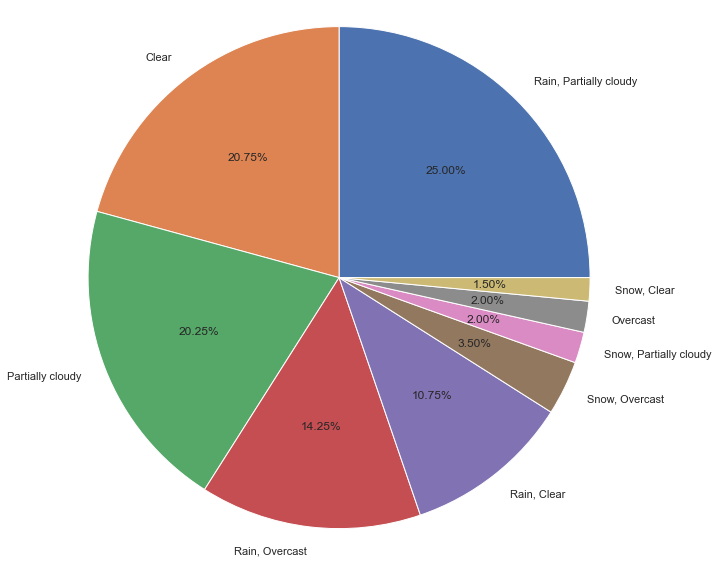

In [43]:
# Weather delay pie chart
labels = ['Rain, Partially cloudy','Clear','Partially cloudy','Rain, Overcast','Rain, Clear','Snow, Overcast','Snow, Partially cloudy','Overcast','Snow, Clear']
sizes = [df3d.value_counts()[0],
        df3d.value_counts()[1],
        df3d.value_counts()[2],
        df3d.value_counts()[3],
        df3d.value_counts()[4],
        df3d.value_counts()[5],
        df3d.value_counts()[6],
        df3d.value_counts()[7],
        df3d.value_counts()[8],]

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

# Task 5
5.A What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?)

5.B Are airlines able to lower the delay during the flights?

Written plan :

5.A
- We will be working with positive arrival delays only, represented in the delay breakwdown by carrier, weather, nas, security or late aircraft
- Get a simple % or arrival delays that started with a departue delay. 
- Pie chart

5.B
- compare dep_delay to arr_delay
- Stretch : group by carrier


## 5.A DEP ARR

In [896]:
# start with flights with arr_delay only
df5c = df[df.carrier_delay.notnull()].copy()

In [902]:
# make bool for positive delays
df5c['bool_dep_delay'] = np.where(df5c.dep_delay >= 1, 1, 0)
df5c['bool_arr_delay'] = np.where(df5c.arr_delay >= 1, 1, 0)

In [905]:
df5c.sort_values('arr_delay')

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,bool_dep_delay,bool_arr_delay
735791,735791,2019-10-30,UA,UA_CODESHARE,UA,6039,YV,N85355,6039,10693,BNA,"Nashville, TN",12264,IAD,"Washington, DC",845,858.0,13.0,16.0,914.0,1133.0,8.0,1126,1141.0,15.0,0,NaN,0,N,101.0,103.0,79.0,1,542,15.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,1
1245370,1245370,2018-12-21,UA,UA_CODESHARE,UA,4788,AX,N11155,4788,14108,PIA,"Peoria, IL",13930,ORD,"Chicago, IL",1922,1920.0,-2.0,30.0,1950.0,2028.0,12.0,2025,2040.0,15.0,0,NaN,0,N,63.0,80.0,38.0,1,130,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,0,1
514331,514331,2019-07-21,NK,NK,NK,725,NK,N908NK,725,13204,MCO,"Orlando, FL",12889,LAS,"Las Vegas, NV",1815,1855.0,40.0,14.0,1909.0,2013.0,6.0,2004,2019.0,15.0,0,NaN,0,N,289.0,264.0,244.0,1,2039,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,1,1
890576,890576,2018-03-10,DL,DL_CODESHARE,DL,3377,9E,N232PQ,3377,10397,ATL,"Atlanta, GA",12266,IAH,"Houston, TX",814,814.0,NaN,36.0,850.0,944.0,6.0,935,950.0,15.0,0,NaN,0,N,141.0,156.0,114.0,1,689,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,0,1
271758,271758,2019-05-05,AA,AA,AA,2308,AA,N994AN,2308,14893,SMF,"Sacramento, CA",11298,DFW,"Dallas/Fort Worth, TX",1414,1437.0,23.0,13.0,1450.0,1942.0,12.0,1939,1954.0,15.0,0,NaN,0,N,205.0,197.0,172.0,1,1431,3.0,0.0,0.0,0.0,12.0,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776058,776058,2018-11-18,AA,AA,AA,2074,AA,N950UW,2074,10423,AUS,"Austin, TX",14100,PHL,"Philadelphia, PA",720,1307.0,1787.0,9.0,1316.0,1719.0,11.0,1147,1730.0,1783.0,0,NaN,0,N,207.0,203.0,183.0,1,1430,1783.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,1
1199336,1199336,2019-11-30,G4,G4,G4,1723,G4,307NV,1723,10135,ABE,"Allentown/Bethlehem/Easton, PA",11697,FLL,"Fort Lauderdale, FL",1919,214.0,1855.0,8.0,222.0,454.0,12.0,2203,506.0,1863.0,0,NaN,0,N,164.0,172.0,152.0,1,1041,1855.0,0.0,8.0,0.0,0.0,2053.0,97.0,55.0,NaN,1,1
1208711,1208711,2018-12-04,DL,DL_CODESHARE,DL,5783,CP,N631CZ,5783,14489,RDM,"Bend/Redmond, OR",14747,SEA,"Seattle, WA",545,1444.0,1979.0,12.0,1456.0,1539.0,16.0,707,1555.0,1968.0,0,NaN,0,N,82.0,71.0,43.0,1,228,1968.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,1
356673,356673,2019-04-12,AA,AA_CODESHARE,AA,3654,MQ,N678AE,3654,11637,FAR,"Fargo, ND",13930,ORD,"Chicago, IL",540,1619.0,2079.0,15.0,1634.0,1759.0,15.0,739,1814.0,2075.0,0,NaN,0,N,119.0,115.0,85.0,1,557,0.0,61.0,0.0,0.0,2014.0,604.0,39.0,39.0,NaN,1,1


In [907]:
df5c.bool_dep_delay.value_counts()[0]

1    264233
0     36580
Name: bool_dep_delay, dtype: int64

In [908]:
df5c.bool_arr_delay.value_counts()

1    300813
Name: bool_arr_delay, dtype: int64

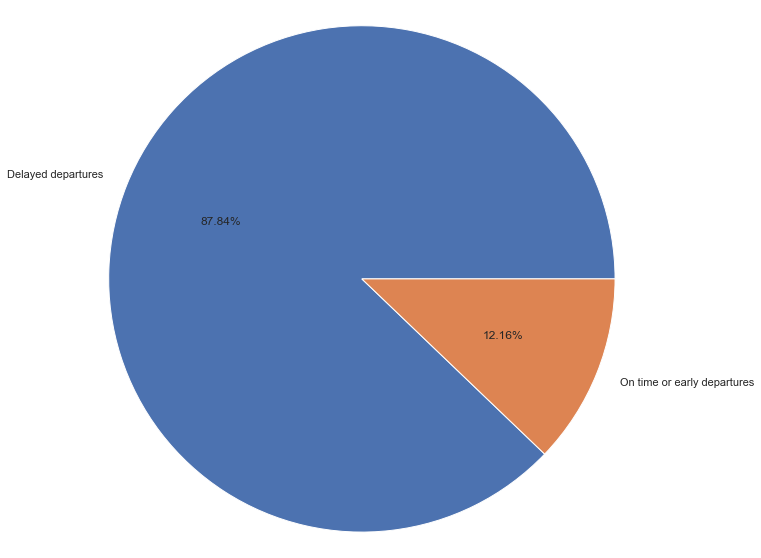

In [912]:
# % of arr_delay flights that sarted with a dep_delay
labels = ['Delayed departures', 'On time or early departures']
sizes = [df5c.bool_dep_delay.value_counts()[1],
         df5c.bool_dep_delay.value_counts()[0] ]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

## 5 Strethc Delay types pie chart

In [923]:
df5 = df[df.carrier_delay.notnull()]

In [924]:
df5a = df5[['mkt_unique_carrier','dep_delay','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].copy()
df5a.sort_values('dep_delay')

,mkt_unique_carrier,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1508186,F9,-31.0,17.0,0.0,0.0,17.0,0.0,0.0
760875,UA,-25.0,22.0,0.0,0.0,22.0,0.0,0.0
1522044,G4,-25.0,17.0,0.0,0.0,17.0,0.0,0.0
1279093,AS,-24.0,23.0,0.0,0.0,23.0,0.0,0.0
814746,UA,-23.0,20.0,0.0,0.0,20.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1552773,DL,NaN,16.0,0.0,0.0,16.0,0.0,0.0
1553824,DL,NaN,24.0,0.0,0.0,24.0,0.0,0.0
1569932,DL,NaN,15.0,0.0,0.0,15.0,0.0,0.0
1575799,DL,NaN,22.0,0.0,0.0,22.0,0.0,0.0


In [65]:
#Sanity check
sum_column = df5[['dep_delay','arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].sum(axis=0)
sum_column

dep_delay              18993682.0
arr_delay              20383987.0
carrier_delay           6133348.0
weather_delay           1130295.0
nas_delay               4912904.0
security_delay            28047.0
late_aircraft_delay     8179036.0
dtype: float64

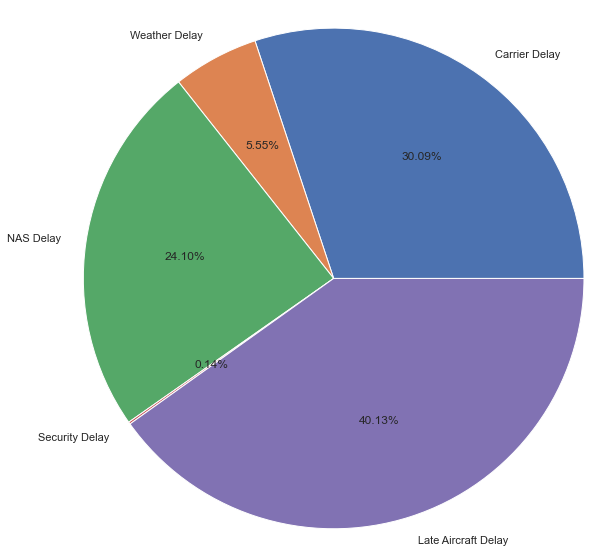

In [774]:
# Delay types pie chart
labels = ['Carrier Delay', 'Weather Delay', 'NAS Delay', 'Security Delay', 'Late Aircraft Delay']
sizes = [df5a.carrier_delay.sum(),
         df5a.weather_delay.sum(),
         df5a.nas_delay.sum(),
         df5a.security_delay.sum(),
         df5a.late_aircraft_delay.sum()
        ]
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

## 5.B In fligh delay reduction.

In [927]:
df5b = df5a 

In [931]:
df5a['delay_difference'] = df5a.arr_delay - df5a.dep_delay
df5a

,mkt_unique_carrier,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_difference
0,DL,31.0,25.0,0.0,0.0,0.0,0.0,25.0,-6.0
2,DL,26.0,43.0,18.0,0.0,17.0,0.0,8.0,17.0
4,DL,41.0,36.0,36.0,0.0,0.0,0.0,0.0,-5.0
9,DL,29.0,32.0,6.0,0.0,3.0,0.0,23.0,3.0
17,DL,42.0,35.0,35.0,0.0,0.0,0.0,0.0,-7.0
...,...,...,...,...,...,...,...,...,...
1592410,AA,14.0,17.0,0.0,0.0,3.0,0.0,14.0,3.0
1592418,DL,58.0,69.0,0.0,58.0,11.0,0.0,0.0,11.0
1592423,DL,31.0,63.0,27.0,0.0,32.0,0.0,4.0,32.0
1592430,DL,21.0,16.0,16.0,0.0,0.0,0.0,0.0,-5.0


In [932]:
#remove null
df5b = df5a[df5a.delay_difference.notnull()]
#remove outliers
df5b = df5a[df5a.delay_difference.between(x.quantile(.05), x.quantile(.95))]
df5b.sort_values('dep_delay')

,mkt_unique_carrier,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_difference
1508186,F9,-31.0,17.0,0.0,0.0,17.0,0.0,0.0,48.0
1522044,G4,-25.0,17.0,0.0,0.0,17.0,0.0,0.0,42.0
760875,UA,-25.0,22.0,0.0,0.0,22.0,0.0,0.0,47.0
1279093,AS,-24.0,23.0,0.0,0.0,23.0,0.0,0.0,47.0
814746,UA,-23.0,20.0,0.0,0.0,20.0,0.0,0.0,43.0
...,...,...,...,...,...,...,...,...,...
776058,AA,1787.0,1783.0,1783.0,0.0,0.0,0.0,0.0,-4.0
1199336,G4,1855.0,1863.0,1855.0,0.0,8.0,0.0,0.0,8.0
1208711,DL,1979.0,1968.0,1968.0,0.0,0.0,0.0,0.0,-11.0
356673,AA,2079.0,2075.0,0.0,61.0,0.0,0.0,2014.0,-4.0


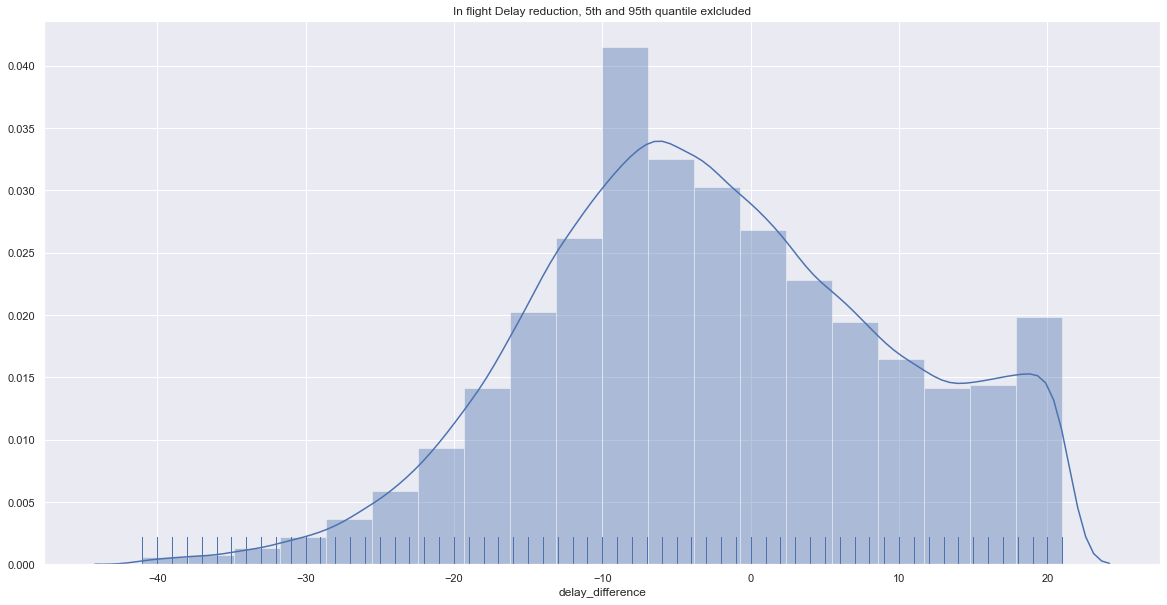

In [776]:
plt.figure(figsize=(20,10))
sns.distplot(df5b.delay_difference, bins=20, rug=True).set_title('In flight Delay reduction, 5th and 95th quantile exlcluded');

In [96]:
df5b.delay_difference.mean()

-2.5458709635501267

In [97]:
df5b.delay_difference.median()

-3.0

In [98]:
df5b.delay_difference.mode()

0   -6.0
dtype: float64

## 5.b Stretch : In flight delay reduction by carrier

In [108]:
df5b.groupby('mkt_unique_carrier').agg({'delay_difference': ['mean', 'median']}).sort_values(('delay_difference','mean'))

delay_difference       
                               mean median
mkt_unique_carrier                        
F9                        -4.906357   -6.0
B6                        -3.610085   -4.0
DL                        -3.420113   -4.0
WN                        -3.373023   -4.0
NK                        -3.295726   -4.0
UA                        -2.455185   -3.0
AA                        -1.843678   -2.0
G4                        -0.270033   -1.0
VX                         0.634241    2.0
AS                         0.856765    1.0
HA                         3.262314    3.0

# Task 7
Test the hypothesis whether planes fly faster when there is the departure delay?

Written plan : 
- create flight_number column as mkt_unique_carrier + mkt_carrier_fl_num
- Get flight_numbers value counts >= 100
- Get mean air_time per flight_number if dep_delay <= 0
- Get mean air_time per flight_number if dep_delay > 0
- Substract ontime airtime mean - delayed airtime mean

In [437]:
df7 = df[(df.dep_delay.notnull()) & (df.air_time.notnull()) & (df.cancelled == 0) & (df.diverted == 0)].copy()
df7.sort_values('dep_delay')

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
598503,598503,2018-01-31,DL,DL_CODESHARE,DL,5683,CP,N631CZ,5683,14747,SEA,"Seattle, WA",14908,SNA,"Santa Ana, CA",1450,1134.0,-196.0,20.0,1154.0,1358.0,12.0,1752,1410.0,-222.0,0,NaN,0,N,-32.0,156.0,124.0,1,978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598508,598508,2018-01-31,DL,DL_CODESHARE,DL,5743,CP,N607CZ,5743,12892,LAX,"Los Angeles, CA",14107,PHX,"Phoenix, AZ",1112,805.0,-187.0,53.0,858.0,1056.0,5.0,1200,1101.0,-59.0,0,NaN,0,N,-30.0,116.0,58.0,1,370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598531,598531,2018-01-31,DL,DL_CODESHARE,DL,6310,G7,N374CA,6310,11433,DTW,"Detroit, MI",11057,CLT,"Charlotte, NC",1935,1652.0,-163.0,11.0,1703.0,1817.0,16.0,2125,1833.0,-172.0,0,NaN,0,N,119.0,101.0,74.0,1,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598515,598515,2018-01-31,DL,DL_CODESHARE,DL,5791,CP,N633CZ,5791,12892,LAX,"Los Angeles, CA",14893,SMF,"Sacramento, CA",1745,1518.0,-147.0,13.0,1531.0,1630.0,5.0,1924,1635.0,-169.0,0,NaN,0,N,100.0,77.0,59.0,1,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598528,598528,2018-01-31,DL,DL_CODESHARE,DL,6281,G7,N368CA,6281,13487,MSP,"Minneapolis, MN",13232,MDW,"Chicago, IL",1511,1246.0,-145.0,23.0,1309.0,1414.0,4.0,1653,1418.0,-155.0,0,NaN,0,N,-35.0,92.0,65.0,1,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776058,776058,2018-11-18,AA,AA,AA,2074,AA,N950UW,2074,10423,AUS,"Austin, TX",14100,PHL,"Philadelphia, PA",720,1307.0,1787.0,9.0,1316.0,1719.0,11.0,1147,1730.0,1783.0,0,NaN,0,N,207.0,203.0,183.0,1,1430,1783.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1199336,1199336,2019-11-30,G4,G4,G4,1723,G4,307NV,1723,10135,ABE,"Allentown/Bethlehem/Easton, PA",11697,FLL,"Fort Lauderdale, FL",1919,214.0,1855.0,8.0,222.0,454.0,12.0,2203,506.0,1863.0,0,NaN,0,N,164.0,172.0,152.0,1,1041,1855.0,0.0,8.0,0.0,0.0,2053.0,97.0,55.0,NaN
1208711,1208711,2018-12-04,DL,DL_CODESHARE,DL,5783,CP,N631CZ,5783,14489,RDM,"Bend/Redmond, OR",14747,SEA,"Seattle, WA",545,1444.0,1979.0,12.0,1456.0,1539.0,16.0,707,1555.0,1968.0,0,NaN,0,N,82.0,71.0,43.0,1,228,1968.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
356673,356673,2019-04-12,AA,AA_CODESHARE,AA,3654,MQ,N678AE,3654,11637,FAR,"Fargo, ND",13930,ORD,"Chicago, IL",540,1619.0,2079.0,15.0,1634.0,1759.0,15.0,739,1814.0,2075.0,0,NaN,0,N,119.0,115.0,85.0,1,557,0.0,61.0,0.0,0.0,2014.0,604.0,39.0,39.0,NaN


In [438]:
# Create flight numbers with carrier - flight number - origin - destination
#df7['flight_number'] = df7['mkt_unique_carrier']+df7['op_carrier_fl_num'].astype(str)+df7['origin']+df7['dest']
df7['flight_number'] = df7['mkt_unique_carrier']+df7['op_carrier_fl_num'].astype(str)+df7['origin']+df7['dest']
df7.sort_values('flight_number')

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,flight_number
959390,959390,2019-08-10,AA,AA,AA,1002,AA,N918US,1002,11057,CLT,"Charlotte, NC",12478,JFK,"New York, NY",1153,1151.0,-2.0,28.0,1219.0,1343.0,10.0,1400,1353.0,-7.0,0,NaN,0,N,127.0,122.0,84.0,1,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA1002CLTJFK
1404868,1404868,2019-09-02,AA,AA,AA,1002,AA,N114UW,1002,11057,CLT,"Charlotte, NC",12478,JFK,"New York, NY",1153,1200.0,7.0,21.0,1221.0,1427.0,15.0,1400,1442.0,42.0,0,NaN,0,N,127.0,162.0,126.0,1,541,7.0,0.0,35.0,0.0,0.0,NaN,NaN,NaN,NaN,AA1002CLTJFK
964627,964627,2019-08-12,AA,AA,AA,1002,AA,N756US,1002,11057,CLT,"Charlotte, NC",12478,JFK,"New York, NY",1153,1252.0,59.0,10.0,1302.0,1426.0,11.0,1400,1437.0,37.0,0,NaN,0,N,127.0,105.0,84.0,1,541,11.0,0.0,0.0,0.0,26.0,NaN,NaN,NaN,NaN,AA1002CLTJFK
1000684,1000684,2019-08-28,AA,AA,AA,1002,AA,N104UW,1002,11057,CLT,"Charlotte, NC",12478,JFK,"New York, NY",1153,1158.0,5.0,22.0,1220.0,1346.0,10.0,1400,1356.0,-4.0,0,NaN,0,N,127.0,118.0,86.0,1,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA1002CLTJFK
486754,486754,2019-07-10,AA,AA,AA,1002,AA,N680AW,1002,11057,CLT,"Charlotte, NC",12478,JFK,"New York, NY",1153,1153.0,0.0,28.0,1221.0,1346.0,16.0,1400,1402.0,2.0,0,NaN,0,N,127.0,129.0,85.0,1,541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA1002CLTJFK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229780,229780,2018-07-18,WN,WN,WN,9,WN,N7718B,9,14730,SDF,"Louisville, KY",10821,BWI,"Baltimore, MD",2025,2044.0,19.0,10.0,2054.0,2203.0,21.0,2150,2224.0,34.0,0,NaN,0,N,85.0,100.0,69.0,1,495,0.0,0.0,15.0,0.0,19.0,NaN,NaN,NaN,NaN,WN9SDFBWI
982076,982076,2019-08-20,WN,WN,WN,9,WN,N558WN,9,14831,SJC,"San Jose, CA",12889,LAS,"Las Vegas, NV",1330,1330.0,0.0,10.0,1340.0,1441.0,11.0,1450,1452.0,2.0,0,NaN,0,N,80.0,82.0,61.0,1,386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN9SJCLAS
1006782,1006782,2019-08-30,WN,WN,WN,9,WN,N428WN,9,14831,SJC,"San Jose, CA",12889,LAS,"Las Vegas, NV",1330,1404.0,34.0,9.0,1413.0,1516.0,6.0,1450,1522.0,32.0,0,NaN,0,N,80.0,78.0,63.0,1,386,3.0,0.0,0.0,0.0,29.0,NaN,NaN,NaN,NaN,WN9SJCLAS
113166,113166,2018-09-24,WN,WN,WN,9,WN,N404WN,9,15304,TPA,"Tampa, FL",11259,DAL,"Dallas, TX",700,700.0,0.0,10.0,710.0,816.0,7.0,825,823.0,-2.0,0,NaN,0,N,145.0,143.0,126.0,1,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN9TPADAL


In [498]:
# example : 'AA2137BOSLGA'
df7[df7['flight_number']== 'AA2137BOSLGA'].sort_values('air_time')

,Unnamed: 0,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,flight_number
1444456,1444456,2019-09-20,AA,AA,AA,2137,AA,N945UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,553.0,-7.0,23.0,616.0,651.0,6.0,721,657.0,-24.0,0,NaN,0,N,81.0,64.0,35.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA
321318,321318,2019-05-27,AA,AA,AA,2137,AA,N952UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,554.0,-6.0,15.0,609.0,646.0,5.0,719,651.0,-28.0,0,NaN,0,N,79.0,57.0,37.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA
1165068,1165068,2019-11-14,AA,AA,AA,2137,AA,N963UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,551.0,-9.0,16.0,607.0,647.0,3.0,723,650.0,-33.0,0,NaN,0,N,83.0,59.0,40.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA
762892,762892,2018-11-12,AA,AA,AA,2137,AA,N965UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,555.0,-5.0,19.0,614.0,655.0,22.0,721,717.0,-4.0,0,NaN,0,N,81.0,82.0,41.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA
1061919,1061919,2019-02-26,AA,AA,AA,2137,AA,N951UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,600.0,0.0,20.0,620.0,701.0,8.0,729,709.0,-20.0,0,NaN,0,N,89.0,69.0,41.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA
663375,663375,2018-08-29,AA,AA,AA,2137,AA,N952UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,554.0,-6.0,24.0,618.0,659.0,15.0,718,714.0,-4.0,0,NaN,0,N,78.0,80.0,41.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA
660186,660186,2018-08-28,AA,AA,AA,2137,AA,N954UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,552.0,-8.0,19.0,611.0,653.0,14.0,718,707.0,-11.0,0,NaN,0,N,78.0,75.0,42.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA
1530295,1530295,2019-01-31,AA,AA,AA,2137,AA,N958UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,555.0,-5.0,21.0,616.0,658.0,11.0,729,709.0,-20.0,0,NaN,0,N,89.0,74.0,42.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA
354134,354134,2019-04-11,AA,AA,AA,2137,AA,N951UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,550.0,-10.0,17.0,607.0,649.0,13.0,725,702.0,-23.0,0,NaN,0,N,85.0,72.0,42.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA
1426028,1426028,2019-09-12,AA,AA,AA,2137,AA,N944UW,2137,10721,BOS,"Boston, MA",12953,LGA,"New York, NY",600,552.0,-8.0,16.0,608.0,651.0,9.0,721,700.0,-21.0,0,NaN,0,N,81.0,68.0,43.0,1,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA2137BOSLGA


In [441]:
df7['flight_number'].value_counts()

UA1768IAHTPA    98
UA778IADMCO     94
NK446LASORD     93
HA64LIHLAX      93
UA706OGGLAX     92
                ..
AA1900TULDFW     1
UA6152OKCIAH     1
WN4159ABQPHX     1
UA3933SYRORD     1
WN3178DENTUL     1
Name: flight_number, Length: 279314, dtype: int64

## Get only flight_number value counts >= 25

In [491]:
df7a = df7[df7.groupby('flight_number').flight_number.transform('count')>=25].copy()

In [492]:
df7a = df7a[['mkt_unique_carrier','flight_number','dep_delay','air_time','distance']]

In [526]:
# Example
df7a[df7a['flight_number']== 'AA5032AVPCLT'].sort_values('air_time')
#df7a

,mkt_unique_carrier,flight_number,dep_delay,air_time,distance
610353,AA,AA5032AVPCLT,-11.0,73.0,509
953048,AA,AA5032AVPCLT,-2.0,76.0,509
299217,AA,AA5032AVPCLT,-5.0,80.0,509
301883,AA,AA5032AVPCLT,-2.0,80.0,509
724174,AA,AA5032AVPCLT,-8.0,81.0,509
985492,AA,AA5032AVPCLT,-6.0,82.0,509
1339228,AA,AA5032AVPCLT,-1.0,83.0,509
1424128,AA,AA5032AVPCLT,-7.0,83.0,509
1088681,AA,AA5032AVPCLT,-10.0,83.0,509
1461980,AA,AA5032AVPCLT,-8.0,83.0,509


In [500]:
# calculate mean airtie of flight numbers when they're on time and when they're late

df7b = df7a.assign(
    on_time_air_time_mean = np.where(df7a['dep_delay'] <= 0 ,df7a.air_time,np.nan),
    delayed_air_time_mean = np.where(df7a['dep_delay'] >0, df7a.air_time,np.nan)
    ).groupby('flight_number').agg({'on_time_air_time_mean':'mean', 'delayed_air_time_mean':'mean'})

In [501]:
# Add difference in minutes
df7b['difference_in_minutes'] = df7b.on_time_air_time_mean - df7b.delayed_air_time_mean

In [642]:
# Calculates percentage change
df7b['pct_faster'] =  df7b.difference_in_minutes  / df7b.on_time_air_time_mean * 100

In [643]:
df7b = df7b[(df7b.on_time_air_time_mean.notnull()) & (df7b.delayed_air_time_mean.notnull())]

df7b.sort_values('difference_in_minutes')

,on_time_air_time_mean,delayed_air_time_mean,difference_in_minutes,pct_faster
flight_number,,,,
F9827TTNTPA,138.343750,204.333333,-65.989583,-47.699721
AA2137BOSLGA,47.066667,82.000000,-34.933333,-74.220963
AA429DCADFW,163.590909,194.250000,-30.659091,-18.741317
UA233SATORD,132.645161,161.000000,-28.354839,-21.376459
AA1098MCIDFW,73.093750,101.200000,-28.106250,-38.452330
...,...,...,...,...
UA389IADSEA,321.280000,301.875000,19.405000,6.039903
HA5LASHNL,364.823529,345.318182,19.505348,5.346516
G41647PSMPGD,191.529412,171.250000,20.279412,10.588145


In [867]:
# Remove outliers
df7c = df7b[df7b.difference_in_minutes.between(x.quantile(.20), x.quantile(.80))]
df7c.sort_values('difference_in_minutes')

,on_time_air_time_mean,delayed_air_time_mean,difference_in_minutes,pct_faster
flight_number,,,,
AA2210DCADFW,173.548387,190.000000,-16.451613,-9.479554
DL2280LGATPA,140.100000,156.500000,-16.400000,-11.705924
UA3454DCAORD,98.117647,114.250000,-16.132353,-16.441847
B6471BOSSJC,357.687500,373.354839,-15.667339,-4.380175
AS1174SFOEWR,292.523810,308.125000,-15.601190,-5.333306
...,...,...,...,...
AS98ANCSEA,182.382353,169.857143,12.525210,6.867556
AA1344CHSDFW,142.562500,130.000000,12.562500,8.811925
UA1580OGGSFO,270.177778,257.333333,12.844444,4.754071


In [ ]:
# df7c = df7b[df7b.pct_faster.between(x.quantile(.10), x.quantile(.90))]
# df7c.sort_values('pct_faster')

In [862]:
df7c.mean()

on_time_air_time_mean    114.530427
delayed_air_time_mean    114.366213
difference_in_minutes      0.164213
pct_faster                -0.163994
dtype: float64

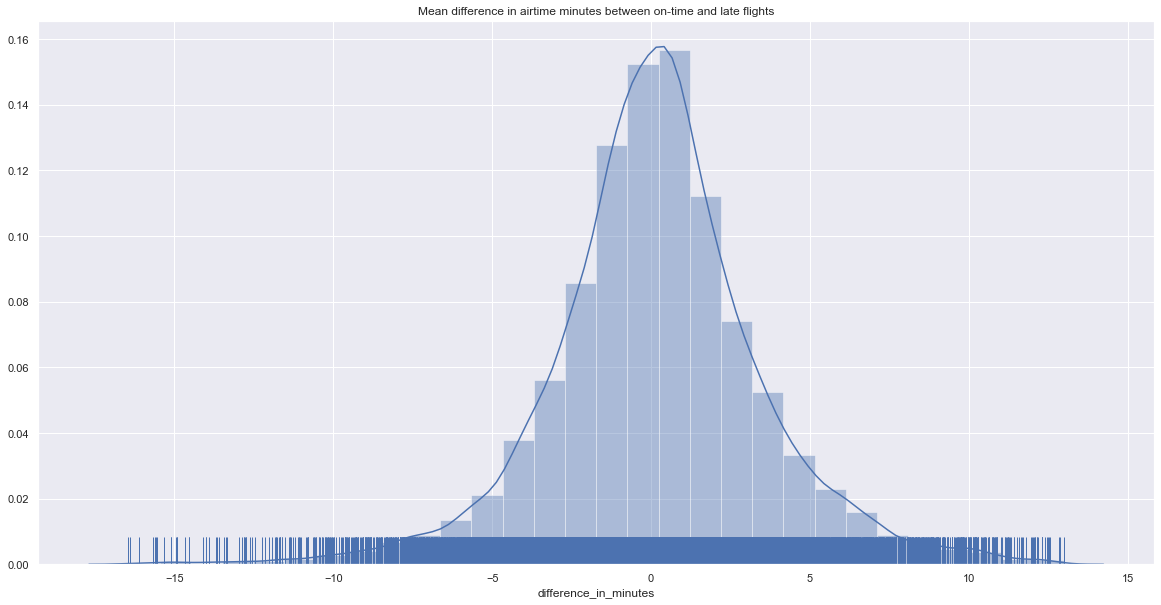

In [868]:
plt.figure(figsize=(20,10))
sns.distplot(df7c.difference_in_minutes, bins=30, rug=True).set_title('Mean difference in airtime minutes between on-time and late flights');

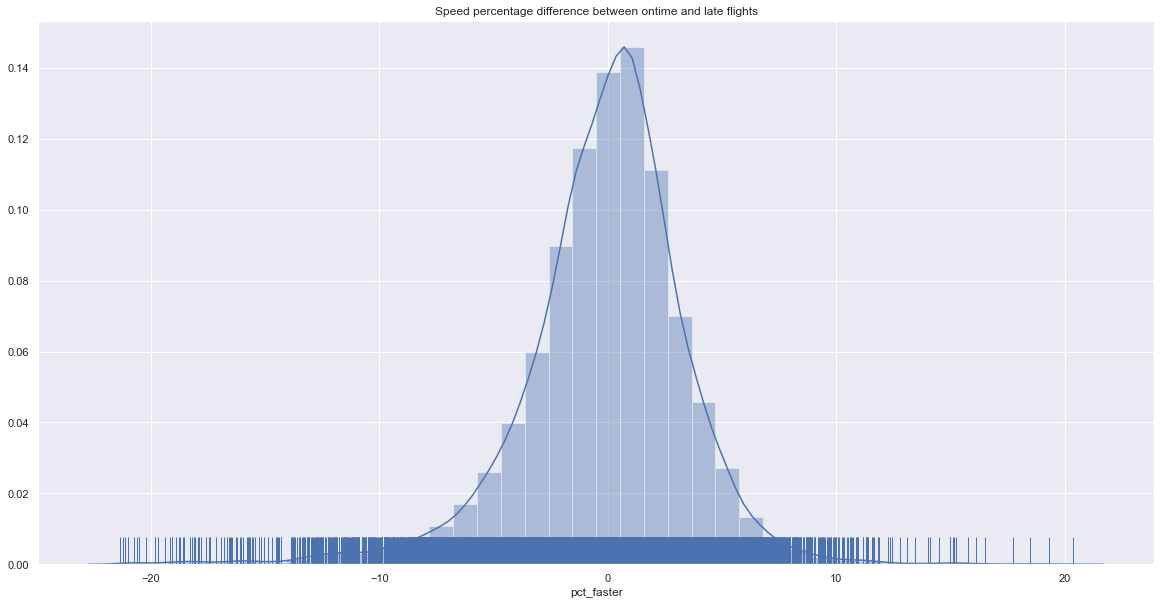

In [866]:
plt.figure(figsize=(20,10))
sns.distplot(df7c.pct_faster, bins=40, rug=True).set_title('Speed percentage difference between ontime and late flights');

# Task 9

9.A Find the top 10 the busiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport?

9.B How much traffic do these 10 airports cover?

Written plan
- Sum of departure flights by origin Airport
- Sum of arrival flights by destination Arport. 
- Sum of departing passengers by origin Airport
- Sum of arriving passengers by destination Arport. 


In [ ]:
# Get 30 busiest airport origin by flight count
df9a = pd.DataFrame(df.origin.value_counts().head(30))
df9a 

In [ ]:
# Get 30 busiest airport dest by flight count
df9b = pd.DataFrame(df.dest.value_counts().head(30))
df9b

In [ ]:
df9c = pd.merge(df9a, df9b, left_index=True, right_index=True)
df9c

In [835]:
# Bring in passenger count table. 
df9d = pd.read_csv(str(path)+"passengers.csv",low_memory=False)

In [ ]:
#df9.sort_values('year')

In [836]:
# use only data from 2018 and 2019
df9d = df9d[(df9d.year >= 2018)].sort_values('year')
df9d

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,unique_carrier,airline_id,unique_carrier_name,region,carrier,carrier_name,carrier_group,carrier_group_new,origin_airport_id,origin_city_market_id,origin,origin_city_name,origin_country,origin_country_name,dest_airport_id,dest_city_market_id,dest,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
480967,0,1,49760,72,64,0,0,2555,293,267,DL,19790,Delta Air Lines Inc.,D,DL,Delta Air Lines Inc.,3,3,13796,32457,OAK,"Oakland, CA",US,United States,11618,31703,EWR,"Newark, NJ",US,United States,6,622,1,2018,2,6,L,DU
638534,0,30,682499,2280,1865,0,0,1163,0,0,QK,20206,Jazz Aviation LP,I,QK,Jazz Aviation LP,0,0,16042,36039,YEG,"Edmonton, Canada",CA,Canada,14771,32457,SFO,"San Francisco, CA",US,United States,6,638,1,2018,11,3,F,IF
638535,0,58,1084369,4524,3106,0,0,414,0,0,QK,20206,Jazz Aviation LP,I,QK,Jazz Aviation LP,0,0,16085,36085,YHZ,"Halifax, Canada",CA,Canada,10721,30721,BOS,"Boston, MA",US,United States,4,482,1,2018,11,1,F,IF
638536,0,44,660000,2200,1357,0,0,310,0,0,QK,20206,Jazz Aviation LP,I,QK,Jazz Aviation LP,0,0,16149,36149,YOW,"Ottawa, Canada",CA,Canada,10721,30721,BOS,"Boston, MA",US,United States,6,629,1,2018,11,1,F,IF
638537,0,54,810000,2700,1706,0,0,452,0,0,QK,20206,Jazz Aviation LP,I,QK,Jazz Aviation LP,0,0,16149,36149,YOW,"Ottawa, Canada",CA,Canada,11278,30852,DCA,"Washington, DC",US,United States,6,629,1,2018,11,1,F,IF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317252,20,20,360000,0,0,207259,0,1017,3964,3704,FX,20107,Federal Express Corporation,L,FX,Federal Express Corporation,3,3,13303,32467,MIA,"Miami, FL",US,United States,12010,32010,GUA,"Guatemala City, Guatemala",GT,Guatemala,1,110,2,2019,6,3,G,IU
317253,20,20,270000,0,0,52865,0,586,2866,2592,FX,20107,Federal Express Corporation,L,FX,Federal Express Corporation,3,3,13303,32467,MIA,"Miami, FL",US,United States,12693,32693,KIN,"Kingston, Jamaica",JM,Jamaica,1,110,2,2019,6,2,G,IU
317254,20,20,360000,0,0,324789,0,682,3115,2810,FX,20107,Federal Express Corporation,L,FX,Federal Express Corporation,3,3,13303,32467,MIA,"Miami, FL",US,United States,13306,33306,MID,"Merida, Mexico",MX,Mexico,1,110,2,2019,6,2,G,IU
317242,20,20,1265397,0,0,574534,0,501,1923,1584,FX,20107,Federal Express Corporation,D,FX,Federal Express Corporation,3,3,14696,34696,SBN,"South Bend, IN",US,United States,13244,33244,MEM,"Memphis, TN",US,United States,6,622,2,2019,6,2,G,DU


In [ ]:
# Get 30 busiest airport origin by passenger count
df9e = pd.DataFrame(df9d.groupby(['origin'])['passengers'].agg('sum').sort_values(ascending=False).head(30))
df9e

In [ ]:
# Get 30 busiest airport destination by passenger count
df9f = pd.DataFrame(df9d.groupby(['dest'])['passengers'].agg('sum').sort_values(ascending=False).head(30))
df9f

In [ ]:
df9g = pd.merge(df9e, df9f, left_index=True, right_index=True)
df9g

In [840]:
# Merge 4 columns together by airport
df9h = pd.merge(df9c, df9g, left_index=True, right_index=True)
df9h

,origin,dest,passengers_x,passengers_y
ORD,78881,78940,81047662,81229682
ATL,78303,79111,106124756,106233021
DFW,58492,58554,68792565,68904374
DEN,55013,54986,65570991,65629175
LAX,50335,49948,86663992,86436842
CLT,50167,50333,46550788,46678999
SEA,37819,37680,49076280,49178528
SFO,35515,35863,55930960,56279989
PHX,35474,35779,44522881,44573041
IAH,35333,35459,43297697,43306497


In [841]:
df9h = df9h.rename(columns={"origin": "Departures", "dest": "Arrivals","passengers_x": "Departing_passengers","passengers_y": "Arriving_passengers"})

In [842]:
df9h = df9h.sort_values('Departing_passengers',ascending=False).head(15)
df9h 

,Departures,Arrivals,Departing_passengers,Arriving_passengers
ATL,78303,79111,106124756,106233021
LAX,50335,49948,86663992,86436842
ORD,78881,78940,81047662,81229682
DFW,58492,58554,68792565,68904374
DEN,55013,54986,65570991,65629175
JFK,25875,25524,61883777,62264857
SFO,35515,35863,55930960,56279989
SEA,37819,37680,49076280,49178528
LAS,33202,33254,48841318,48894592
MCO,28164,28131,48136663,48395644


<Figure size 432x288 with 0 Axes>

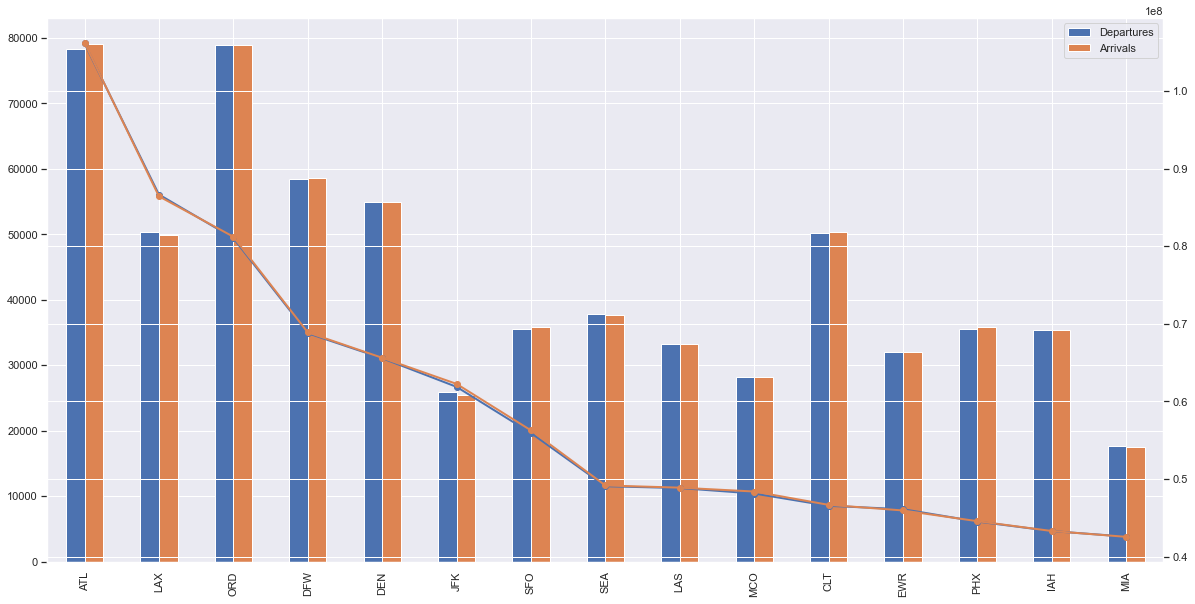

In [843]:
import matplotlib.pyplot as plt
fig = plt.figure()

ax = df9h[['Departures','Arrivals']].plot(kind='bar', use_index=True,figsize=(20,10))
ax2 = ax.twinx()

ax2.plot(ax.get_xticks(),
         df9h[['Departing_passengers','Arriving_passengers']].values,
         linestyle='-',
         marker='o', linewidth=2.0)